## EDA (Exploratory Data Analysis) performed in the Stack Overflow Dataset.

Some EDA techniques are performed in the processed CSV files for the Stack Overflow Dataset in order to check if the
selected features from dataset are relevant, measuring some useful characteristics related to word encoders, outliers, among others.

In [1]:
#Imports for analysis
from os import path
import csv
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#Install import_ipynb to import other notebooks
!pip install import_ipynb

In [2]:
#Download and prepare the Pre-trained GloVe Word Embedding model
path_to_glove_zipfile = "../processed_files/glove.42B.300d.zip"
path_to_glove_file = "../processed_files/glove.42B.300d.txt"

if not path.exists(path_to_glove_file):
    if not path.exists(path_to_glove_zipfile):
        print("downloading glove .zip file...")
        !wget http://nlp.stanford.edu/data/glove.42B.300d.zip
    print("unzipping glove .zip file...")
    !unzip -q glove.42B.300d.zip

In [3]:
#Import Glove class
from glove import Glove

ModuleNotFoundError: No module named 'glove'

In [ ]:
#Instance of Glove
glove = Glove()

In [4]:
#Iterator for given file
def iterate_file(file_path):
    with open(file_path, "r", encoding="utf-8") as f:
        reader = csv.DictReader(f, delimiter=",")
        for row in reader:
            yield row

In [6]:
# get positive and negative stars for every word
# get percentage of unkown words for vocab

count_wordsinvocab = 0
count_words = 0
count_questions_with_unkown = 0
count_questions = 0
weights_directory = {}
unkown_counter = {} 

for row in iterate_file("../processed_files/data_stackoverflow_train.csv"):
    words = row.split(" ")
    one_unkown=False
    count_questions +=1
    for word in words:
        if word!="":
            count_words += 1
            if count_words%1000000==0:
                print("words:",count_words)
            if word in glove.embeddings:
                count_wordsinvocab +=1
            else:
                unkown_counter[word] = unkown_counter.get(word, 0)+1
                one_unkown=True
        
    count_questions_with_unkown += one_unkown
    
unkown_counts = [count for count in unkown_counter.values()]
unkown_counts.sort()

for count in unkown_counts[-10:]:
    print(count, [word for word,counti in unkown_counter.items() if count==counti])

print("percentage of words in vocab:", count_wordsinvocab / count_words)
print("percentage of question with unkown words:", count_questions_with_unkown/count_questions)

AttributeError: 'collections.OrderedDict' object has no attribute 'split'

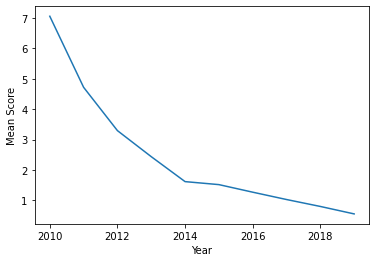

In [7]:
#Find relation between dates and score of questions
#Create dictionary of years
years = {}

#Reads input file and updates dates inside the dictionary
def update_dates(filename):
    #Iterate through file
    for row in iterate_file(filename):
        #Get year data
        year = int(row["creation_date"].split("T")[0].split("-")[0])
        #Append year into dictionary with its score
        if year in years:
            years[year].append(int(row["score"]))
        else:
            years[year] = [(int(row["score"]))]

#Read all 3 files to fill up years dictionary
update_dates("../processed_files/data_stackoverflow_test.csv")
update_dates("../processed_files/data_stackoverflow_train.csv")
update_dates("../processed_files/data_stackoverflow_val.csv")

means = [np.mean(scores) for year, scores in years.items()]

plt.plot(list(years.keys()), means)
plt.xlabel("Year")
plt.ylabel("Mean Score")
plt.show()